# dataset 1

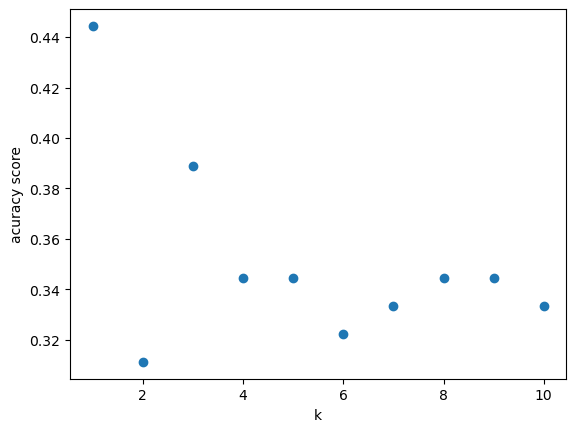

,ANA,Amorphous,CAN,CHA,EDI,ERI/OFF,FAU,GIS,JBW,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CAN,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHA,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EDI,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
FAU,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
GIS,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
JBW,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
LTA,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0


,ANA,Amorphous,CAN,CHA,EDI,ERI/OFF,FAU,GIS,JBW,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
Amorphous,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
CAN,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
CHA,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EDI,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
FAU,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
GIS,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
JBW,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
LTA,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


正解率(Accuracy) : 訓練 1.0, 検証 0.5


In [1]:
import pandas as pd
dataset=pd.read_csv('flat_dataset_1.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 8]
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=36, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train=(x_train-x_train.mean())/x_train.mean()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
ks=np.arange(1, 11, 1)
all_ks=[]
accuracy_in_cv_all=[]
fold=StratifiedKFold(n_splits=3, shuffle=True, random_state=3)
for k in ks:
    model=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    estimated_y_in_cv=cross_val_predict(model, autoscaled_x_train, y_train, cv=fold)
    accuracy_in_cv=metrics.accuracy_score(y_train, estimated_y_in_cv)
    accuracy_in_cv_all.append(accuracy_in_cv)
    all_ks.append(k)

import matplotlib.pyplot as plt
plt.scatter(all_ks, accuracy_in_cv_all)
plt.xlabel('k')
plt.ylabel('acuracy score')
plt.show()
optimal_k=ks[accuracy_in_cv_all.index(max(accuracy_in_cv_all))]

model=KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, y_train)
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
phase=list(set(y))
phase.sort()
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=phase, columns=phase)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=phase, columns=phase)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
display(confusion_matrix_train)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
confusion_matrix_train.to_csv('matrix_train_kNN_1.csv')
confusion_matrix_test.to_csv('matrix_test_kNN_1.csv')

# dataset 2

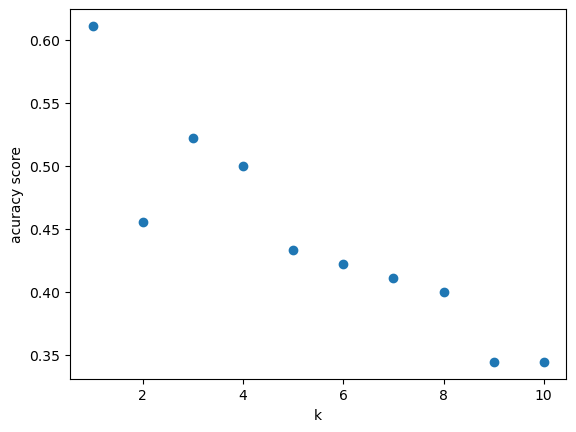

,ANA,Amorphous,CAN,CHA,EDI,ERI/OFF,FAU,GIS,JBW,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CAN,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHA,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EDI,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
FAU,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
GIS,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
JBW,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
LTA,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0


,ANA,Amorphous,CAN,CHA,EDI,ERI/OFF,FAU,GIS,JBW,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
CAN,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHA,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EDI,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
FAU,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
GIS,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
JBW,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
LTA,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


正解率(Accuracy) : 訓練 1.0, 検証 0.4722222222222222


In [2]:
import pandas as pd
dataset=pd.read_csv('flat_dataset_2.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 8]
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=36, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train=(x_train-x_train.mean())/x_train.mean()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
ks=np.arange(1, 11, 1)
all_ks=[]
accuracy_in_cv_all=[]
fold=StratifiedKFold(n_splits=3, shuffle=True, random_state=3)
for k in ks:
    model=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    estimated_y_in_cv=cross_val_predict(model, autoscaled_x_train, y_train, cv=fold)
    accuracy_in_cv=metrics.accuracy_score(y_train, estimated_y_in_cv)
    accuracy_in_cv_all.append(accuracy_in_cv)
    all_ks.append(k)

import matplotlib.pyplot as plt
plt.scatter(all_ks, accuracy_in_cv_all)
plt.xlabel('k')
plt.ylabel('acuracy score')
plt.show()
optimal_k=ks[accuracy_in_cv_all.index(max(accuracy_in_cv_all))]

model=KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, y_train)
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
phase=list(set(y))
phase.sort()
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=phase, columns=phase)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=phase, columns=phase)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
display(confusion_matrix_train)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
confusion_matrix_train.to_csv('matrix_train_kNN_2.csv')
confusion_matrix_test.to_csv('matrix_test_kNN_2.csv')

# dataset 3

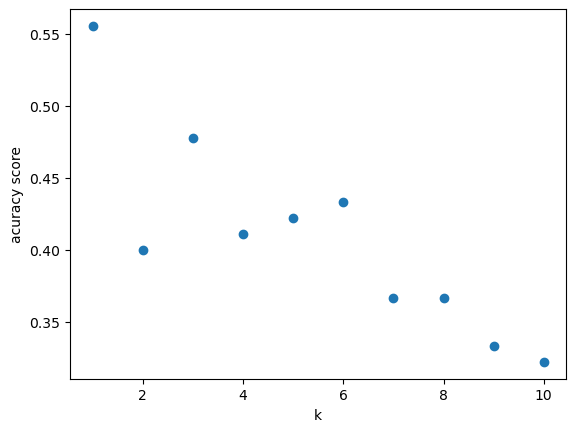

,ANA,Amorphous,CAN,CHA,EDI,ERI/OFF,FAU,GIS,JBW,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CAN,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHA,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EDI,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
FAU,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
GIS,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
JBW,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
LTA,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0


,ANA,Amorphous,CAN,CHA,EDI,ERI/OFF,FAU,GIS,JBW,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
CAN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
CHA,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
EDI,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
FAU,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
GIS,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
JBW,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
LTA,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


正解率(Accuracy) : 訓練 1.0, 検証 0.3888888888888889


In [3]:
import pandas as pd
dataset=pd.read_csv('flat_dataset_3.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 8]
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=36, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train=(x_train-x_train.mean())/x_train.mean()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
ks=np.arange(1, 11, 1)
all_ks=[]
accuracy_in_cv_all=[]
fold=StratifiedKFold(n_splits=3, shuffle=True, random_state=3)
for k in ks:
    model=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    estimated_y_in_cv=cross_val_predict(model, autoscaled_x_train, y_train, cv=fold)
    accuracy_in_cv=metrics.accuracy_score(y_train, estimated_y_in_cv)
    accuracy_in_cv_all.append(accuracy_in_cv)
    all_ks.append(k)

import matplotlib.pyplot as plt
plt.scatter(all_ks, accuracy_in_cv_all)
plt.xlabel('k')
plt.ylabel('acuracy score')
plt.show()
optimal_k=ks[accuracy_in_cv_all.index(max(accuracy_in_cv_all))]

model=KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, y_train)
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
phase=list(set(y))
phase.sort()
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=phase, columns=phase)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=phase, columns=phase)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
display(confusion_matrix_train)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
confusion_matrix_train.to_csv('matrix_train_kNN_3.csv')
confusion_matrix_test.to_csv('matrix_test_kNN_3.csv')

# dataset 4

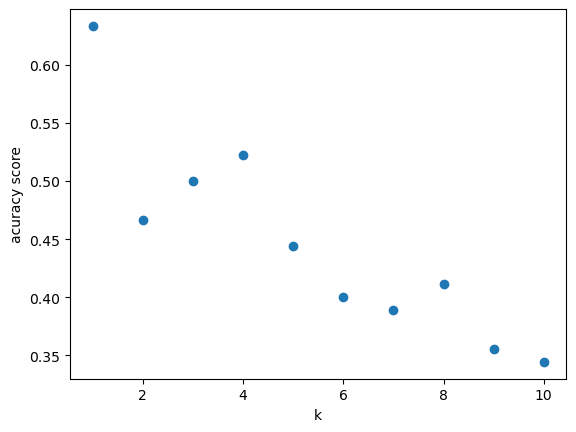

,ANA,Amorphous,CAN,CHA,EDI,ERI/OFF,FAU,GIS,JBW,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CAN,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHA,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EDI,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
FAU,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
GIS,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
JBW,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
LTA,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0


,ANA,Amorphous,CAN,CHA,EDI,ERI/OFF,FAU,GIS,JBW,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
CAN,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
CHA,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
EDI,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
ERI/OFF,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
FAU,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
GIS,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
JBW,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
LTA,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0


正解率(Accuracy) : 訓練 1.0, 検証 0.4166666666666667


In [4]:
import pandas as pd
dataset=pd.read_csv('flat_dataset_4.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 8]
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=36, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train=(x_train-x_train.mean())/x_train.mean()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
ks=np.arange(1, 11, 1)
all_ks=[]
accuracy_in_cv_all=[]
fold=StratifiedKFold(n_splits=3, shuffle=True, random_state=3)
for k in ks:
    model=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    estimated_y_in_cv=cross_val_predict(model, autoscaled_x_train, y_train, cv=fold)
    accuracy_in_cv=metrics.accuracy_score(y_train, estimated_y_in_cv)
    accuracy_in_cv_all.append(accuracy_in_cv)
    all_ks.append(k)

import matplotlib.pyplot as plt
plt.scatter(all_ks, accuracy_in_cv_all)
plt.xlabel('k')
plt.ylabel('acuracy score')
plt.show()
optimal_k=ks[accuracy_in_cv_all.index(max(accuracy_in_cv_all))]

model=KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, y_train)
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
phase=list(set(y))
phase.sort()
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=phase, columns=phase)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=phase, columns=phase)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
display(confusion_matrix_train)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
confusion_matrix_train.to_csv('matrix_train_kNN_4.csv')
confusion_matrix_test.to_csv('matrix_test_kNN_4.csv')

# dataset 5

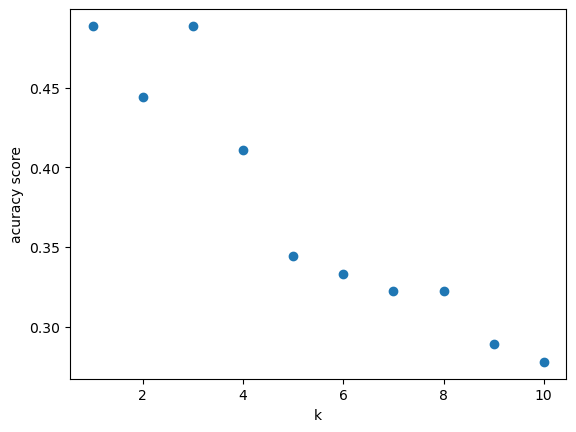

,ANA,Amorphous,CAN,CHA,EDI,ERI/OFF,FAU,GIS,JBW,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amorphous,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CAN,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHA,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EDI,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0
FAU,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
GIS,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
JBW,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
LTA,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0


,ANA,Amorphous,CAN,CHA,EDI,ERI/OFF,FAU,GIS,JBW,LTA,LTL,MER,MFI,MOR,PHI,RHO,SOD,TON
ANA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Amorphous,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
CAN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CHA,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
EDI,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
ERI/OFF,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
FAU,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
GIS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
JBW,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
LTA,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


正解率(Accuracy) : 訓練 1.0, 検証 0.2777777777777778


In [5]:
import pandas as pd
dataset=pd.read_csv('flat_dataset_5.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 8]
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=36, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train=(x_train-x_train.mean())/x_train.mean()
autoscaled_x_test=(x_test-x_train.mean())/x_train.std()
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
ks=np.arange(1, 11, 1)
all_ks=[]
accuracy_in_cv_all=[]
fold=StratifiedKFold(n_splits=3, shuffle=True, random_state=3)
for k in ks:
    model=KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    estimated_y_in_cv=cross_val_predict(model, autoscaled_x_train, y_train, cv=fold)
    accuracy_in_cv=metrics.accuracy_score(y_train, estimated_y_in_cv)
    accuracy_in_cv_all.append(accuracy_in_cv)
    all_ks.append(k)

import matplotlib.pyplot as plt
plt.scatter(all_ks, accuracy_in_cv_all)
plt.xlabel('k')
plt.ylabel('acuracy score')
plt.show()
optimal_k=ks[accuracy_in_cv_all.index(max(accuracy_in_cv_all))]

model=KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
model.fit(autoscaled_x_train, y_train)
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))
phase=list(set(y))
phase.sort()
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=phase, columns=phase)
confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=phase, columns=phase)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
display(confusion_matrix_train)
display(confusion_matrix_test)
print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
confusion_matrix_train.to_csv('matrix_train_kNN_5.csv')
confusion_matrix_test.to_csv('matrix_test_kNN_5.csv')